# Loops & Orbits &mdash; Week 3 &mdash; Day 1

## Battery Charging &mdash; with `numpy`

To the user, the battery appears to be a single component, but to an electrical engineer, it needs to
be modeled as at least two components:

* One component that resists charging or discharging regardless of how full the battery is. This will be called R0 in our code below.
* A second component, that depends on the state of the battery. The battery has S=0 when it is discharged and S=1 when it is fully charged. Voc(S) defines the battery's open circuit voltage as a function of its state. This voltage source is the second component.

**Just execute the imports.** There is nothing here for you to work on.

In [1]:
# Use the numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each function we write:
import unittest

Next, define all the constants.

Q (the amount of charge) is measured in mAh (milli-amp hours) for most consumer electronics batteries. So an amount of charge Q goes into the battery as it goes from empty (S=0) to full (S=1).

The constants a1, b1, a2, b2, and c are from Figure 4(b) of Ruifeng Zhang, Bizhong Xia, Baohua Li, Libo Cao, Yongzhi Lai,Weiwei Zheng, Huawen Wang, Wei Wang, and Mingwang Wang, "Study on the Open Circuit Voltage and State of Charge Characterization of High Capacity Lithium-Ion Battery Under Different Temperature",
published in [Energies 2018, Volume 11, Issue 9, p 2408](https://www.mdpi.com/1996-1073/11/9/2408). Download the PDF and go to the bottom of page 5 to see the open-circuit voltage model.

**You need to implement the open-circuit voltage model from their paper. The implementation that is currently
there is a dummy implementation.**

In [2]:
# At 25 degrees Centigrade
a1 = 3.679
b1 = -0.1101
a2 = -0.2528
b2 = -6.829
c = 0.9386

# open-circuit voltage model
def Voc(S):
    # The rest of this function definition is a dummy implementation that you should replace with the model
    # from the paper by fixing the following lines to agree with their paper. Their model has exponentials in it.
    # When you need an exponential function, you can do it like this (although you don't need to make a separate
    # variable -- you can write it out as one big formula).
    #
    # whatever_exponentiated = np.exp(whatever)
    #
    # In the preceding, notice the use of the np.exp function -- not the exp function from the math library.
    #
    # Your formula will involve a1, b1, a2, b2, c, and S
    #
    # HAH! Their model has an obvious typo in it. The b1 in the second exponential should be b2!
    #
    voltage = a1 * np.exp(b1 * S) + a2 * np.exp(b2 * S) + c * S**2
    # voltage = 3.5 + 0.5 * S
    return voltage

# The charger voltage
charger_voltage = Voc(1.0) # The charger voltage to eventually get the battery 100% full
    
### Unit tests ###

class OpenCircuitVoltageTests(unittest.TestCase):
    
    def test_discharged_voltage(self):
        # a simple case to test -- empty
        self.assertAlmostEqual(Voc(0.0), a1 + a2)
        
    def test_full_voltage(self):
        # another -- almost as simple case to test -- full
        self.assertAlmostEqual(charger_voltage, a1 * np.exp(b1) + a2 * np.exp(b2) + c)

testSuite = unittest.TestLoader().loadTestsFromName("__main__.OpenCircuitVoltageTests")
testRunner = unittest.TextTestRunner(verbosity=2)
testRunner.run(testSuite)

test_discharged_voltage (__main__.OpenCircuitVoltageTests) ... ok
test_full_voltage (__main__.OpenCircuitVoltageTests) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

## More Constants Needed for a Realistic Simulation

We need a realistic charging time. How about 5 hours. We'll model that in 5-second increments. So that's 3600
simulation steps.

We also need:

* The battery's total size, expressed in milliamp-hours and Coulumbs.
* The battery's internal resistance.

**Just execute the cell below.** There is nothing here for you to work on.

In [3]:
# The following two parameters establish the simulation time step and its maximum total duration:
delta_t = 5.0                  # simulation time step in seconds
simulation_time_steps = 3600   # 5 hours of charging for a delta_t of 5.0

# Battery capacity
capacity_mAh = 3100.0 # capacity in milliamp-hours -- mAh -- a nice phone battery
# Convert battery capacity in mAh to Coulombs
seconds_in_an_hour = 3600.0
milliamps_in_an_amp = 1000.0
capacity_coulombs = capacity_mAh * seconds_in_an_hour / milliamps_in_an_amp
# that's right folks, with capacity_mAh = 3100, that's going to be a whopping 11,160 Coulombs!

# The battery's internal resistance
internal_resistance = 0.200 # internal resistance in Ohms -- usually called R0

## Finish the Plotting Code

To make a nice plot, **you need to define the Ss**. You can easily make what we want with np.arange().

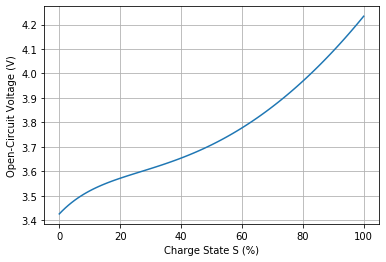

In [4]:
# Data for plotting
# For the Ss (ess'es) we want 101 values from 0.00 to 1.00 stepping by 0.01.
# 0.00, 0.01, 0.02, ..., 1.00.
# That's easy to do with Make them with np.arange. Go back to Friday's notebook
# or Google np.arange if you don't remember how np.arange works.
# The following is a dummy implementation
Ss = np.arange(0.00, 1.01, 0.01)

# The Vs (vee's) are the corresponding voltages for each battery state.
# This is where the power of numpy starts to show. The computer is computing 101 Vs in the next step.
Vs = Voc(Ss)

# Convert the Ss to percentages.
# Again the power of numpy is that 100.0 * Ss multiplies all 101 Ss by 100 with a single line of code.
Ss = 100.0 * Ss

# Now invoke the plot functions as usual
plt.plot(Ss, Vs)
plt.xlabel("Charge State S (%)")
plt.ylabel("Open-Circuit Voltage (V)")
plt.grid()

plt.show()

## Checkpoint

Make sure you have the model right. Your two indications that your model is right are:

* The unit tests passed.
* Your curve looks like the curve in Zhang et al's figure Figure 4(b) &mdash; that figure is about half-way down page 7 of the paper you already downloaded.

## The While Loop That Does the Work

In every step below, I have done the Ss. **You need to do the corresponding &mdash; slightly easier! &mdash; thing for the times.**

**You also need to implement the assignments that have the physics in them!**

**I have marked all the places you need to implement with `# You!` so that you don't miss any.**

In [5]:
# Initialize the charge state
Ss = np.zeros((simulation_time_steps + 1,))

# Initialize the times
times = np.zeros((simulation_time_steps + 1,))

# The 0th elements of Ss and times are already filled in.
# Start the loop with i = 1 and go for 3600 more steps
for i in range(1, simulation_time_steps + 1):
    #
    # get all the before values
    #
    # charge state
    before_S = Ss[i - 1]
    # time
    before_time = times[i - 1]
    #
    # get the battery's open-circuit voltage for this change state
    #
    battery_voltage = Voc(before_S)
    #
    # get the charging rate -- this is where the physics is -- remind me to put the physics on the whiteboard!
    #
    voltage_difference = charger_voltage - battery_voltage
    charging_rate = voltage_difference / internal_resistance
    amount_of_charge = delta_t * charging_rate
    
    # Now it's pretty much the usual update code:
    change_in_charge_state = amount_of_charge / capacity_coulombs
    after_S = before_S + change_in_charge_state
    # update time
    after_time = before_time + delta_t
    #
    # assign the after values into their lists
    #
    Ss[i] = after_S
    times[i] = after_time
    i = i + 1


## Graph


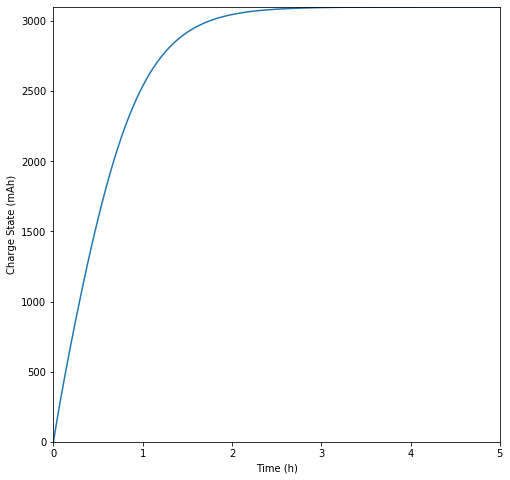

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(times / seconds_in_an_hour, Ss * capacity_mAh)

plt.xlabel("Time (h)")
plt.ylabel("Charge State (mAh)")

# Size the x-axis to go from 0 to the maximum time in hours
plt.xlim(0.0, delta_t * simulation_time_steps / seconds_in_an_hour)
# Size the y-axis to run from empty to full (0 to capacity_mAh):
plt.ylim(0.0, capacity_mAh)

plt.show()

## Conclusion

Looks like the phone battery is extremely close to full after three hours of charging.

Step back and think about what was accomplished.

### Final Checkpoint

Show Ben or me that you have the right graphs. While you are waiting for one of us, contemplate your accomplishments.

#### Accomplishments

* You have completely changed gears from mechanics to circuitry. This &mdash; and tomorrow's special class on economics with Prof. Andr&aacute;s Margitay-Becht &mdash; are designed to show you what a wide range of problems can be solved with finite-difference methods.
* You have gained some familiarity with how physicists and electrical engineers model circuits. More specifically, you have gained some familiarity with how battery engineers model battery charging.
* Battery charging is an excellent example of what is called a first-order differential equation. These equations are very often used in biology, ecology, and economics. First-order differential equations are actually simpler than the second-order differential equations (involving acceleration) that Newton realized were critical to the formulation of mechanics.
* You have started using numpy. You have seen some of the trickiness in using it and you have seen some payoff in terms of its power to do massive amounts of floating-point computations in parallel.

I tell you truly, this is a massive amount to be getting to in just the third week of an immersion.

Please don't stress if you are not yet feeling any sense of mastery of what you did Friday and today. I am aware that you are only gaining familiarity. Gaining familiarity is important to give you a sense of the range of what as possible with computational methods, and to know how the numpy, matplotlib, and unittest are commonly used to write high-quality scientific code.